# EUA : Educación

Información acerca de la Educación, las Finanzas y las Industrias en Estados Unidos de América en los años 2019, 2020 y 2021.

- **Educación:** Información sobre la población estimada de personas pertenecientes a varios grupos de edad que tienen niveles de educación específicos. Información acumulada a un nivel de los códigos postales de EUA para años determinados.

- **Finanzas:** Información sobre la población estimada de viviendas pertenecientes a varios niveles salariales. Información acumulada a un nivel de los códigos postales de EUA para años determinados.

- **Industria:** Información sobre la población estimada de personas pertenecientes a varios tipos industriales. Información acumulada a un nivel de los códigos postales de EUA para años determinados.

**Tabla Educación**

Esta tabla / csv contiene información con las siguientes columnas / características / *features*:

- Año
- Distrito congresual *(Congressional district)*
- Individuos con Licenciatura *(Bachelor's degree)* o un grado mayor
- Individuos con Certificado de preparatoria *(highschool diploma)* o algún grado
- Individuos con educación menor a tener Certificado de preparatoria

Donde cada fila representa la partición de la población en cada Distrito congresual *(Congressional district)* por nivel de educación, por año (2020 y 2021). El nivel educativo se refiere al equivalente de educación superior, educación media superior y educación básica en México

## Importar librerías generales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Preguntas que se quieren responder acerca de la educación

1. ¿Cuál es la **distribución** de la educación en el **país**? *(2020 y 2021)*

2. ¿Cuál es el **top 5** con la **mayor proporción** de individuos con **educación superior**? *(2020 y 2021, distritos congresuales y estados)*

3. ¿Cuál es el **bottom 5** con la **menor proporción** de individuos con **educación superior**? *(2020 y 2021, distritos congresuales y estados)*

4. ¿Cuál es el **top 5** con la **mayor proporción** de individuos con **menos de educación media superior**? *(2020 y 2021, distritos congresuales y estados)*

5. ¿Cuál es el **bottom 5** con la **menor proporción** de individuos con **menos de educación media superior**? *(2020 y 2021, distritos congresuales y estados)*

6. ¿Cuáles son las regiones con un **mayor aumento porcentual** en educación superior de 2020 a 2021? *(distritos congresuales y estados)*

7. ¿Cuáles son las regiones con un **menor aumento porcentual** en educación superior de 2020 a 2021? *(distritos congresuales y estados)*

## Visualizaciones de Educación

1. **Comparación** de la **distribución** de la educación en el **país por año**

    - **Comparación** de la **distribución** de la educación por **Distrito congresual por año**
    - **Comparación** de la **distribución** de la educación por **Estado por año**

3. **Top 5** regiones en educación **superior por año** *(distritos congresuales y estados)*

4. **Bottom 5** regiones en educación **superior por año** *(distritos congresuales y estados)*

5. **Top 5** regiones en **menos de educación media superior por año** *(distritos congresuales y estados)*

6. **Bottom 5** regiones en **menos de educación media superior por año** *(distritos congresuales y estados)*

## Revisión y limpieza de datos de educación

### Vista previa, dimensiones y renombrar columnas

In [2]:
# Vista previa y dimensiones
datos = pd.read_csv("..\\datos\\Educationv.csv")
display(datos.head())
print(f"Dimensiones : {datos.shape}")

,Year,cd,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
0,2020,0_AK,121098,309698,33572
1,2020,0_DC,277816,177505,34652
2,2020,0_DE,175338,351177,57053
3,2020,0_ND,137958,303148,26631
4,2020,0_PR,121098,309698,33572


Dimensiones : (874, 5)


In [3]:
# Renombrar columnas a español
datos.rename(columns={
    "Year": "anio",
    "cd": "dist_congresual",
    "Bachelors_degree_or_higher": "edu_superior",
    "high_school_or_some_degree": "edu_media_superior",
    "Less_than_high_school_graduate": "menos_de_edu_media_superior"
}, inplace=True)
datos.head()

,anio,dist_congresual,edu_superior,edu_media_superior,menos_de_edu_media_superior
0,2020,0_AK,121098,309698,33572
1,2020,0_DC,277816,177505,34652
2,2020,0_DE,175338,351177,57053
3,2020,0_ND,137958,303148,26631
4,2020,0_PR,121098,309698,33572


### Revisión de tipo de datos por columna

In [4]:
datos.dtypes

anio                            int64
dist_congresual                object
edu_superior                    int64
edu_media_superior              int64
menos_de_edu_media_superior     int64
dtype: object

In [5]:
datos["dist_congresual"] = datos["dist_congresual"].astype("string")
datos.dtypes

anio                                    int64
dist_congresual                string[python]
edu_superior                            int64
edu_media_superior                      int64
menos_de_edu_media_superior             int64
dtype: object

Se cambió el tipo de dato de la columna `dist_congresual` de `object` a `string[python]`.

### Revisión de la calidad de los datos

#### Revisión de datos faltantes

In [6]:
print("Datos faltantes por columna:")
datos.isnull().sum()

Datos faltantes por columna:


anio                           0
dist_congresual                0
edu_superior                   0
edu_media_superior             0
menos_de_edu_media_superior    0
dtype: int64

#### Revisión de duplicados y valores únicos en Año y Distrito congresual

In [7]:
# Años únicos
anios_unicos = datos["anio"].unique()
print(anios_unicos)

[2020 2021]


In [8]:
# Valores únicos de "dist_congresual"
def valores_unicos(datos, anio:int=None):
    if anio is not None:
        datos = datos[datos["anio"]==anio]
    else:
        anio=""
    
    num_valores = datos.shape[0]
    num_cd_unicos = len(datos["dist_congresual"].unique())
    print(f"Valores unicos en 'dist_congresual' {anio}:\n{num_cd_unicos}, {100*num_cd_unicos/num_valores:.2f}% del total\n")

valores_unicos(datos)
valores_unicos(datos, 2020)
valores_unicos(datos, 2021)

Valores unicos en 'dist_congresual' :
437, 50.00% del total

Valores unicos en 'dist_congresual' 2020:
437, 100.00% del total

Valores unicos en 'dist_congresual' 2021:
437, 100.00% del total



Se confirmó que todos los registros en la tabla son de los años 2020 y 2021. También se confirmó que no hay valores faltantes con respecto a los distritos congresuales dado que hay uno y solo un registro por distrito congresual **por año** en la tabla.

#### Revisión de rangos de valores numéricos

In [9]:
datos[[
    "edu_superior",
    "edu_media_superior",
    "menos_de_edu_media_superior"
]].describe()

,edu_superior,edu_media_superior,menos_de_edu_media_superior
count,874.000000,8.740000e+02,874.000000
mean,145140.191076,2.697666e+05,49555.389016
std,80253.572692,1.090870e+05,30658.095659
min,2872.000000,1.260300e+04,2072.000000
25%,92277.500000,1.990038e+05,31810.500000
50%,125552.500000,2.666335e+05,43866.000000
75%,180793.250000,3.409162e+05,58573.250000
max,561182.000000,1.191468e+06,257422.000000


In [10]:
print("Índice de fila para valores máximos:")
datos[[
    "edu_superior",
    "edu_media_superior",
    "menos_de_edu_media_superior"
]].idxmax("index")

Índice de fila para valores máximos:


edu_superior                   441
edu_media_superior             441
menos_de_edu_media_superior    441
dtype: int64

In [11]:
print("Información de la fila con valores máximos:")
print(datos.iloc[441,:])

print("Suma de partición por educación:")
print(datos[[
    "edu_superior",
    "edu_media_superior",
    "menos_de_edu_media_superior"
]].iloc[441,:].sum())

Información de la fila con valores máximos:
anio                              2021
dist_congresual                   0_PR
edu_superior                    561182
edu_media_superior             1191468
menos_de_edu_media_superior     257422
Name: 441, dtype: object
Suma de partición por educación:
2010072


Como todos los valores numéricos están en el intervalo $[0,\infty)$, se concluye que no hay valores negativos.

Los valores máximos de todas las categorías de educación corresponden al distrito congresional **"Puerto Rico"**, por lo que los valores tan altos de población en todos los niveles educativos tienen sentido.

## Transformación de datos

In [12]:
datos.head()

,anio,dist_congresual,edu_superior,edu_media_superior,menos_de_edu_media_superior
0,2020,0_AK,121098,309698,33572
1,2020,0_DC,277816,177505,34652
2,2020,0_DE,175338,351177,57053
3,2020,0_ND,137958,303148,26631
4,2020,0_PR,121098,309698,33572


In [13]:
datos["estado"] = datos["dist_congresual"].str.split("_",expand=True).rename(columns={1:"estado"})["estado"]
datos.head()

,anio,dist_congresual,edu_superior,edu_media_superior,menos_de_edu_media_superior,estado
0,2020,0_AK,121098,309698,33572,AK
1,2020,0_DC,277816,177505,34652,DC
2,2020,0_DE,175338,351177,57053,DE
3,2020,0_ND,137958,303148,26631,ND
4,2020,0_PR,121098,309698,33572,PR


### Crear tabla "Datos por estado"

In [14]:
df = (datos[datos["anio"]==2020])[["estado","dist_congresual"]].groupby(by="estado").count().rename(columns={"dist_congresual":"num_dist_congresuales"})
df[df["num_dist_congresuales"]>1]

,num_dist_congresuales
estado,
AL,7
AR,4
AZ,9
CA,52
CO,8
CT,5
FL,28
GA,14
HI,2


In [15]:
datos_por_estado = datos.groupby(by=["estado","anio"]).sum()[["edu_superior","edu_media_superior","menos_de_edu_media_superior"]].reset_index()
datos_por_estado.head()

,estado,anio,edu_superior,edu_media_superior,menos_de_edu_media_superior
0,AK,2020,121098,309698,33572
1,AK,2021,122648,306728,33268
2,AL,2020,727011,1914775,359092
3,AL,2021,753218,1949082,357737
4,AR,2020,401604,1192299,207823


### Crear columnas porcentuales

In [16]:
def calcular_porcentajes(columna, datos=datos):
    return round(100 * datos[columna]/(datos["edu_superior"] + datos["edu_media_superior"] + datos["menos_de_edu_media_superior"]), 2)

In [17]:
datos["edu_superior_%"] = calcular_porcentajes("edu_superior")
datos["edu_media_superior_%"] = calcular_porcentajes("edu_media_superior")
datos["menos_de_edu_media_superior_%"] = calcular_porcentajes("menos_de_edu_media_superior")

datos.head()

,anio,dist_congresual,edu_superior,edu_media_superior,menos_de_edu_media_superior,estado,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
0,2020,0_AK,121098,309698,33572,AK,26.08,66.69,7.23
1,2020,0_DC,277816,177505,34652,DC,56.70,36.23,7.07
2,2020,0_DE,175338,351177,57053,DE,30.05,60.18,9.78
3,2020,0_ND,137958,303148,26631,ND,29.49,64.81,5.69
4,2020,0_PR,121098,309698,33572,PR,26.08,66.69,7.23


In [18]:
datos_por_estado["edu_superior_%"] = calcular_porcentajes("edu_superior", datos_por_estado)
datos_por_estado["edu_media_superior_%"] = calcular_porcentajes("edu_media_superior", datos_por_estado)
datos_por_estado["menos_de_edu_media_superior_%"] = calcular_porcentajes("menos_de_edu_media_superior", datos_por_estado)

datos_por_estado.head()

,estado,anio,edu_superior,edu_media_superior,menos_de_edu_media_superior,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
0,AK,2020,121098,309698,33572,26.08,66.69,7.23
1,AK,2021,122648,306728,33268,26.51,66.30,7.19
2,AL,2020,727011,1914775,359092,24.23,63.81,11.97
3,AL,2021,753218,1949082,357737,24.61,63.69,11.69
4,AR,2020,401604,1192299,207823,22.29,66.18,11.53


### 2020 vs 2021 con tablas dinámicas

In [19]:
tabla = pd.pivot_table(
    datos, values="edu_superior_%", index="dist_congresual",
    columns=["anio"], aggfunc="sum"
)
tabla["2021 vs 2020"] = tabla[2021]-tabla[2020]
tabla

anio,2020,2021,2021 vs 2020
dist_congresual,,,
0_AK,26.08,26.51,0.43
0_DC,56.70,58.35,1.65
0_DE,30.05,30.87,0.82
0_ND,29.49,29.68,0.19
0_PR,26.08,27.92,1.84
...,...,...,...
9_PA,21.74,22.19,0.45
9_TN,29.39,30.28,0.89
9_TX,28.05,28.50,0.45


In [20]:
tabla_por_estado = pd.pivot_table(
    datos_por_estado, values="edu_superior_%", index="estado",
    columns=["anio"], aggfunc="sum"
)
tabla_por_estado["2021 vs 2020"] = tabla_por_estado[2021]-tabla_por_estado[2020]
tabla_por_estado

anio,2020,2021,2021 vs 2020
estado,,,
AK,26.08,26.51,0.43
AL,24.23,24.61,0.38
AR,22.29,22.66,0.37
AZ,26.88,27.73,0.85
CA,31.82,32.40,0.58
CO,38.07,39.32,1.25
CT,38.11,38.55,0.44
DC,56.70,58.35,1.65
DE,30.05,30.87,0.82


## Análisis de datos

### Mapeos de nombres a tablas y columnas

In [21]:
tablas = {
    "distritos": datos,
    "estados": datos_por_estado,
    "distritos_edu_superior_%": tabla,
    "estados_edu_superior_%": tabla_por_estado
}

columnas = {
    "distritos": "dist_congresual",
    "estados": "estado"
}

### 1. ¿Cuál es la **distribución** de la educación en el **país**? *(2020 y 2021)*

In [22]:
def distribucion_educacion(anio:int):
    datos_anio = datos[datos["anio"]==anio]
    proporciones_pais = datos_anio[[
        "edu_superior",
        "edu_media_superior",
        "menos_de_edu_media_superior"
    ]].sum()

    nombres = [
        "Educación superior",
        "Educación media superior",
        "Menos de Edu. media superior"
    ]

    plt.pie(
        proporciones_pais,
        labels=nombres,
        autopct="%1.1f%%"
    )
    plt.title(f"Población en EUA por nivel educativo {anio}")
    plt.show()

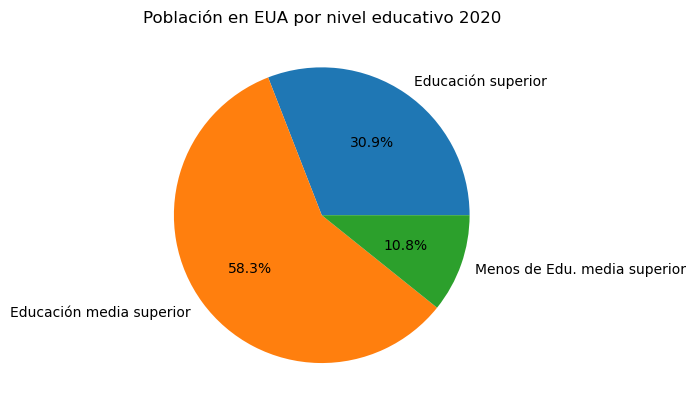

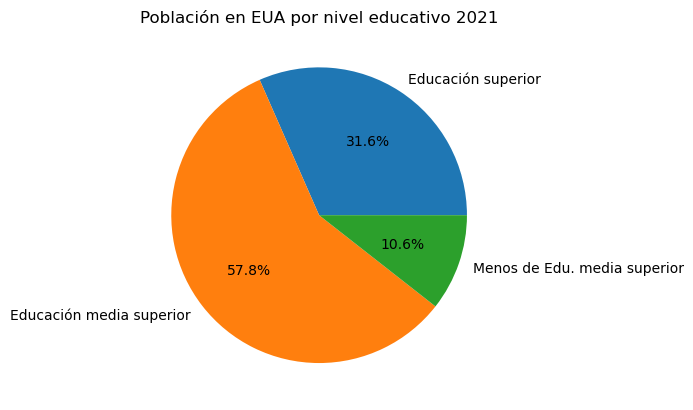

In [23]:
distribucion_educacion(2020)
distribucion_educacion(2021)

### 2. ¿Cuál es el **top 5** con la **mayor proporción** de individuos con **educación superior**? *(2020 y 2021)*

In [24]:
def top5_edu_superior(anio, nombre_tabla:str):
    tabla = tablas[nombre_tabla]
    columna = columnas[nombre_tabla]
    datos_anio = tabla[tabla["anio"]==anio]
    return datos_anio.sort_values(by="edu_superior_%",ascending=False).head()[[columna,"edu_superior_%","edu_media_superior_%","menos_de_edu_media_superior_%"]]

#### Por distrito congresual

In [25]:
top5_edu_superior(2020, "distritos")

,dist_congresual,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
322,5_IL,82.19,16.33,1.48
84,12_NY,72.36,22.69,4.95
263,36_CA,69.04,27.71,3.25
120,17_CA,67.21,26.94,5.86
76,11_VA,64.58,29.78,5.64


In [26]:
top5_edu_superior(2021, "distritos")

,dist_congresual,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
759,5_IL,83.16,15.47,1.37
521,12_NY,71.68,23.36,4.96
700,36_CA,70.20,26.67,3.13
557,17_CA,68.21,26.76,5.02
513,11_VA,65.79,28.86,5.35


#### Por estado

In [27]:
top5_edu_superior(2020, "estados")

,estado,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
14,DC,56.70,36.23,7.07
38,MA,42.73,49.41,7.86
62,NJ,39.99,51.59,8.42
40,MD,38.51,52.69,8.80
12,CT,38.11,53.86,8.03


In [28]:
top5_edu_superior(2021, "estados")

,estado,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
15,DC,58.35,35.00,6.66
39,MA,43.33,48.79,7.88
63,NJ,40.75,50.94,8.31
11,CO,39.32,52.39,8.29
41,MD,39.12,52.09,8.78


### 3. ¿Cuál es el **bottom 5** con la **menor proporción** de individuos con **educación superior**? *(2020 y 2021)*

In [29]:
def bottom5_edu_superior(anio, nombre_tabla:str):
    tabla = tablas[nombre_tabla]
    columna = columnas[nombre_tabla]
    datos_anio = tabla[tabla["anio"]==anio]
    return datos_anio.sort_values(by="edu_superior_%",ascending=True).head()[[columna,"edu_superior_%","edu_media_superior_%","menos_de_edu_media_superior_%"]]

#### Por distrito congresual

In [30]:
bottom5_edu_superior(2020, "distritos")

,dist_congresual,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
213,29_TX,6.86,54.14,39.00
182,21_CA,7.58,59.04,33.38
257,33_CA,10.07,62.98,26.95
88,13_CA,12.18,61.14,26.68
186,22_CA,12.54,62.53,24.94


In [31]:
bottom5_edu_superior(2021, "distritos")

,dist_congresual,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
650,29_TX,6.96,55.00,38.04
619,21_CA,8.02,59.43,32.55
694,33_CA,10.09,63.82,26.09
525,13_CA,12.50,61.25,26.26
623,22_CA,12.89,62.68,24.43


#### Por estado

In [32]:
bottom5_edu_superior(2020, "estados")

,estado,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
50,MS,20.63,66.24,13.14
100,WV,20.70,68.87,10.42
4,AR,22.29,66.18,11.53
66,NV,22.61,63.98,13.40
36,LA,22.89,63.56,13.55


In [33]:
bottom5_edu_superior(2021, "estados")

,estado,edu_superior_%,edu_media_superior_%,menos_de_edu_media_superior_%
101,WV,20.97,68.62,10.41
51,MS,21.16,65.89,12.94
5,AR,22.66,66.13,11.21
67,NV,23.29,63.44,13.27
37,LA,23.55,63.30,13.15


### 4. ¿Cuál es el **top 5** con la **mayor proporción** de individuos con **menos de edu media superior**? *(2020 y 2021)*

In [34]:
def top5_menos_de_edu_media_superior(anio, nombre_tabla:str):
    tabla = tablas[nombre_tabla]
    columna = columnas[nombre_tabla]
    datos_anio = tabla[tabla["anio"]==anio]
    return datos_anio.sort_values(by="menos_de_edu_media_superior_%",ascending=False).head()[[columna,"menos_de_edu_media_superior_%","edu_superior_%","edu_media_superior_%"]]

#### Por distrito congresual

In [35]:
top5_menos_de_edu_media_superior(2020, "distritos")

,dist_congresual,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
213,29_TX,39.00,6.86,54.14
182,21_CA,33.38,7.58,59.04
216,3_AZ,30.19,12.73,57.08
258,33_TX,29.37,17.67,52.96
113,15_TX,27.84,18.55,53.61


In [36]:
top5_menos_de_edu_media_superior(2021, "distritos")

,dist_congresual,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
650,29_TX,38.04,6.96,55.00
619,21_CA,32.55,8.02,59.43
695,33_TX,28.73,20.72,50.55
653,3_AZ,28.62,13.86,57.52
550,15_TX,27.11,19.22,53.67


#### Por estado

In [37]:
top5_menos_de_edu_media_superior(2020, "estados")

,estado,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
88,TX,14.52,28.04,57.44
8,CA,14.48,31.82,53.70
36,LA,13.55,22.89,63.56
66,NV,13.40,22.61,63.98
50,MS,13.14,20.63,66.24


In [38]:
top5_menos_de_edu_media_superior(2021, "estados")

,estado,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
9,CA,14.28,32.40,53.32
89,TX,14.22,28.86,56.92
67,NV,13.27,23.29,63.44
37,LA,13.15,23.55,63.30
65,NM,13.06,24.22,62.72


### 5. ¿Cuál es el **bottom 5** con la **menor proporción** de individuos con **menos de edu media superior**? *(2020 y 2021)*

In [39]:
def bottom5_menos_de_edu_media_superior(anio, nombre_tabla:str):
    tabla = tablas[nombre_tabla]
    columna = columnas[nombre_tabla]
    datos_anio = tabla[tabla["anio"]==anio]
    return datos_anio.sort_values(by="menos_de_edu_media_superior_%",ascending=True).head()[[columna,"menos_de_edu_media_superior_%","edu_superior_%","edu_media_superior_%"]]

#### Por distrito congresual

In [40]:
bottom5_menos_de_edu_media_superior(2020, "distritos")

,dist_congresual,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
322,5_IL,1.48,82.19,16.33
263,36_CA,3.25,69.04,27.71
396,7_WA,3.73,61.84,34.42
176,2_WI,4.14,46.38,49.49
124,17_PA,4.19,41.28,54.53


In [41]:
bottom5_menos_de_edu_media_superior(2021, "distritos")

,dist_congresual,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
759,5_IL,1.37,83.16,15.47
700,36_CA,3.13,70.20,26.67
833,7_WA,3.50,62.33,34.17
561,17_PA,3.95,41.60,54.45
613,2_WI,4.22,47.06,48.72


#### Por estado

In [42]:
bottom5_menos_de_edu_media_superior(2020, "estados")

,estado,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
56,ND,5.69,29.49,64.81
22,HI,5.87,30.63,63.50
42,ME,6.20,30.31,63.48
60,NH,6.29,35.11,58.60
52,MT,6.41,29.99,63.60


In [43]:
bottom5_menos_de_edu_media_superior(2021, "estados")

,estado,menos_de_edu_media_superior_%,edu_superior_%,edu_media_superior_%
23,HI,5.79,31.46,62.75
57,ND,5.99,29.68,64.33
61,NH,6.08,35.64,58.28
43,ME,6.16,31.00,62.84
95,VT,6.25,36.64,57.12


### 6. ¿Cuáles son las regiones con un **mayor aumento porcentual** positivo en educación superior de 2020 a 2021?

In [44]:
def cambio_positivo_2020vs2021(nombre_tabla):
    return tablas[nombre_tabla].sort_values(by="2021 vs 2020", ascending=False).head()

#### Por distrito congresual

In [45]:
cambio_positivo_2020vs2021("distritos_edu_superior_%")

anio,2020,2021,2021 vs 2020
dist_congresual,,,
22_TX,23.58,29.85,6.27
33_TX,17.67,20.72,3.05
21_TX,30.11,32.93,2.82
1_CO,49.19,51.84,2.65
38_TX,16.59,19.15,2.56


#### Por estado

In [46]:
cambio_positivo_2020vs2021("estados_edu_superior_%")

anio,2020,2021,2021 vs 2020
estado,,,
PR,26.08,27.92,1.84
DC,56.70,58.35,1.65
CO,38.07,39.32,1.25
VT,35.65,36.64,0.99
FL,28.26,29.25,0.99


### 7. ¿Cuáles son las regiones con un **menor aumento porcentual** en educación superior de 2020 a 2021?

In [47]:
def cambio_negativo_2020vs2021(nombre_tabla):
    tabla = tablas[nombre_tabla] 
    return tabla.sort_values(by="2021 vs 2020", ascending=True).head()

#### Por distrito congresual

In [48]:
cambio_negativo_2020vs2021("distritos_edu_superior_%")

anio,2020,2021,2021 vs 2020
dist_congresual,,,
12_NY,72.36,71.68,-0.68
1_OR,45.75,45.21,-0.54
1_SC,37.62,37.12,-0.50
2_NC,56.42,56.01,-0.41
1_AL,24.52,24.11,-0.41


#### Por estado

In [49]:
cambio_negativo_2020vs2021("estados_edu_superior_%")

anio,2020,2021,2021 vs 2020
estado,,,
ND,29.49,29.68,0.19
IA,28.16,28.40,0.24
WV,20.70,20.97,0.27
NM,23.92,24.22,0.30
ID,25.56,25.88,0.32
